In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let us look at our house pricing dataset again.

In [3]:
df = pd.read_csv('../data/portland_housing_prices.csv')
df.head()

,area,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


- $x \in \bf{R}^2$
- $x_1^{(i)}$ - living area of of the $i^{th}$ training sample
- $x_2^{(i)}$ - number of bedrooms in the $i^{th}$ training sample

Now we need to decide the structure of hypothesis $h$, let us assume that we approximate $y$ as a linear function of $x$, i.e. - $$h_{\theta}(x) = {\theta}_0+  {\theta}_1x_1 + {\theta}_2x_2$$

Where $\theta$ are the parameters parameterizing the space of linear functions mapping from $\bf{X}$ to $\bf{Y}$. <br>
Let us assume that there's an intercept term $x_0 = 1$, then $h_{\theta}(x)$ can be represented as - 
$$h_{\theta}(x)  = \Sigma_{i = 1}^{d}{\theta}_ix_i = \theta^Tx$$

Now, our goal is to learn the parameters $\theta$. We can do so by making $h_{\theta}(x)$ as close to $y$ as possible. **Cost function** would give us that quantitative measure.

### Cost Function - 
For each value of $\theta$ close is the $h_{\theta}(x^{(i)})$ to $y^{i}$. 

For the given regression problem, we cn define the cost function (function of $\theta$) as follows -
$$J(\theta) = \frac{1}{2}\Sigma_{i = 1}^{n}(h_{\theta}(x^{i}) - y^{i})^2$$

Minimizing this squared cost function will give rise to the **ordinary least square** solution.

## LMS Algorithm

We need to find the value of $\theta$ that minimize the $J(\theta)$. We'll use the **gradient descent** algorithm. We start with some initial guess of $\theta$ and iteratively converge to the optimal value of $\theta$. 
$$\theta_{j} := \theta_{j} - \alpha\frac{\partial J(\theta)}{\partial {\theta}_j}$$
- $\alpha$ - learning rate 

Update is simultaneously applied to all the values of $j = [0, .., d]$

To find the optimal value of $\theta$ we first need to find the derivative of $J(\theta)$ 
$$\begin{align*}
\frac{\partial J(\theta)}{\partial {\theta}_i} &= \frac{\partial }{\partial {\theta}_j}\frac{1}{2}\Sigma_{i = 1}^{n}(h_{\theta}(x^{(i)}) - y^{(i)})^2 \\
&= \Sigma_{i = 1}^{n}\frac{\partial }{\partial {\theta}_j}(\theta^Tx^{(i)} - y^{(i)})^2 \\
&= \Sigma_{i = 1}^{n} (\theta^Tx^{(i)} - y^{(i)})x_j^{(i)}
\end{align*}
$$

$$
\therefore {\theta}_j := {\theta}_j + \alpha \Sigma_{i = 1}^{n} (y^{(i)} - \theta^Tx^{(i)})x_j^{(i)}
$$

This rule is called the **LMS** update rule or the **Widrow-hoff** learning rule. 

So for the entire dataset and grouping the $\theta$ into a single vector - 
We repeat until convergence - 
$$
\therefore {\theta} := {\theta} + \alpha \Sigma_{i = 1}^{n} (y^{(i)} - \theta^Tx^{(i)})x^{(i)}
$$

This optimization problem has only one global and no other local minima, as $J$ is a convex quadratic function.


In [77]:
from tqdm import tqdm
# batch gradient descent algorithm 
epoch = 100
alpha = 0.01
n = len(df)

# initial guess of theta
theta = np.array([[48.], [30.]])

X = df['area'].values.reshape(-1,1)/1000
X = np.hstack((np.ones((n,1)),X))

y = np.ceil(df['price'].values.reshape(-1,1)/1000)

print(f"X shape: {X.shape} \ny shape: {y.shape} \ntheta shape: {theta.shape}")

# dimension of X
# d = X.shape[1]
# J = []
print(np.dot(X,theta).shape)
for k in range(epoch):
    h = np.dot(X,theta)
    err = y - h
    print(theta)
    theta = theta + alpha*np.dot(X.T, err)/n

X shape: (47, 2) 
y shape: (47, 1) 
theta shape: (2, 1)
(47, 1)
[[48.]
 [30.]]
[[50.32490213]
 [35.29722422]]
[[52.52057468]
 [40.30315839]]
[[54.59413775]
 [45.03384803]]
[[56.55231918]
 [49.50445477]]
[[58.40147622]
 [53.72930504]]
[[60.14761593]
 [57.72193607]]
[[61.79641443]
 [61.49513938]]
[[63.35323519]
 [65.06100188]]
[[64.82314621]
 [68.43094461]]
[[66.21093633]
 [71.61575951]]
[[67.52113056]
 [74.625644  ]]
[[68.75800467]
 [77.47023379]]
[[69.92559887]
 [80.15863378]]
[[71.02773083]
 [82.69944731]]
[[72.0680079 ]
 [85.10080382]]
[[73.04983872]
 [87.37038489]]
[[73.97644415]
 [89.515449  ]]
[[74.85086765]
 [91.54285473]]
[[75.67598499]
 [93.4590829 ]]
[[76.45451355]
 [95.2702573 ]]
[[77.189021  ]
 [96.98216438]]
[[77.88193358]
 [98.60027186]]
[[ 78.53554387]
 [100.12974623]]
[[ 79.15201816]
 [101.57546941]]
[[ 79.73340339]
 [102.94205437]]
[[ 80.28163377]
 [104.23385998]]
[[ 80.79853694]
 [105.45500501]]
[[ 81.28583986]
 [106.60938131]]
[[ 81.74517437]
 [107.70066637]]
[[ 82.17

In [66]:
y[0]

array([400.])

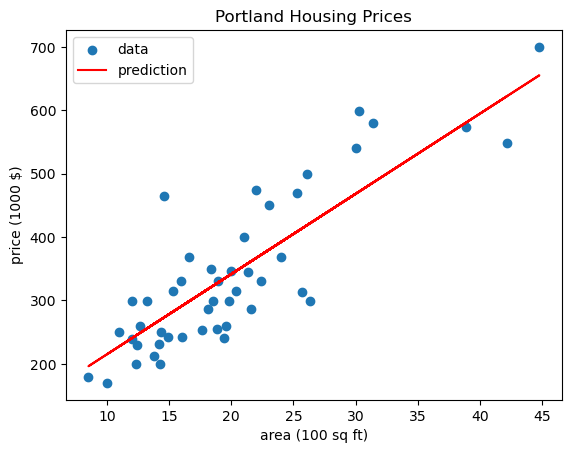

In [81]:
y = np.dot(X,theta)
plt.scatter(df['area']/100,df['price']/1000, label = 'data')
plt.plot(df['area']/100,y,'r', label = 'prediction')
plt.xlabel('area (100 sq ft)')
plt.ylabel('price (1000 $)')
plt.title('Portland Housing Prices')
plt.legend()